# Cleaning
# 清洗数据

## Gather

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 100)  # 设置显示数据的最大列数，防止出现省略号…，导致数据显示不全
pd.set_option('expand_frame_repr', False)  # 当列太多时不自动换行

In [2]:
patients = pd.read_csv('../Assess/patients.csv')
treatments = pd.read_csv('../Assess/treatments.csv')
adverse_reactions = pd.read_csv('../Assess/adverse_reactions.csv')

## Access

### Quality
#####  *`treatment`表*
- 丢失数据(应该350名患者，实际280)
- 缺少hba1c_change
- 'auralin`和`novodra`列中的起始剂量和最终剂量旁边的'u'
- 小写名称
- 错误数据类型（zip_code, assigned sex, state, birthday）
- 错误的HbA1c change

##### `patients`表
- zip_code格式不佳（例如，四位数和浮点数据类型而不是五位数字和字符串或对象数据类型）
- 患者身高值不正确（例如，Tim Neudorf身高27英寸而不是72英寸）
- state不一致(有时是完整的州名，有时是缩写)
- Dsvid 拼写错误，应该是David
- 错误数据类型（auranlin and novodra colums）
- 话号码格式不一致
- 有不可恢复的无名氏记录
- Jakobsen, Gersten, Taylor有多项记录
- Zaitseva的重量单位是“kgs”而不是“lbs”（磅）

##### `adverse_reactions`表
- 小写名称

### Tidiness
- 联系人列表中，电话和邮箱应该分为两列
- 治疗表中，将auranlin and novodra 分为三个变量（treatment, start does and end does）

## Clean

![title](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/gitnote/2019/04/26/1556209407985-1556209407997.png)

### copy一份原数据，命名为*_clean

In [3]:
patients_clean = patients.copy()
patients_clean.sample(3)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
337,338,male,León,Reynoso,385 Walnut Avenue,Eagle,ID,83642.0,United States,208-830-2415LeonReynosoRendon@einrot.com,5/16/1931,209.4,65,34.8
220,221,male,Mijael,Guerra,1271 Pretty View Lane,Oakland,CA,94612.0,United States,MijaelGuerraMoreno@teleworm.us+1 (707) 896-9250,1/25/1944,183.5,65,30.5
14,15,female,Asia,Woźniak,4970 Heather Sees Way,Tulsa,OK,74105.0,United States,AsiaWozniak@rhyta.com918-712-3469,8/15/1997,112.0,65,18.6


In [4]:
treatments_clean = treatments.copy()
treatments_clean.sample(3)

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
119,liisa,seppälä,36u - 47u,-,7.87,7.51,0.36
31,bao,she,-,48u - 45u,9.09,8.62,NaN
171,justyna,kowalczyk,24u - 34u,-,9.84,9.44,NaN


In [5]:
adverse_reactions_clean = adverse_reactions.copy()
adverse_reactions_clean.sample(3)

,given_name,surname,adverse_reaction
5,jasmine,sykes,hypoglycemia
26,clinton,miller,throat irritation
13,leon,scholz,injection site discomfort


### Clean for [Tidiness]

#### 联系人列表中，电话和邮箱应该分为两列

*pandas.Series.str.extract [来源]*  
`Series.str.extract(pat, flags=0, expand=True)`  

对于系列中的每个主题字符串，从正则表达式pat的第一个匹配中提取组。  

**参数：**	
- `pat` ： 字符串
具有捕获组的正则表达式模式。

- `flags` ： int，默认为0（无标志）
来自re模块的标志，例如re.IGNORECASE，修改正则表达式匹配，例如大小写，空格等。有关详细信息，请参阅re。

- `expand` ： bool，默认为True
如果为True，则返回DataFrame，每个捕获组一列。如果为False，如果有一个捕获组，则返回系列/索引;如果有多个捕获组，则返回DataFrame。

**返回：**	
**DataFrame或系列或索引**  
一个DataFrame，每个主题字符串有一行，每个组有一列。正则表达式pat中的任何捕获组名称都将用于列名称; 否则将使用捕获组编号。即使找不到匹配项，每个结果列的dtype也始终为object。如果 expand=False和pat只有一个捕获组，则返回一个系列（如果主题是系列）或索引（如果主题是索引）。

- phone_number
    - str.extract(regEx, expand=True) return a new DataFrame with n columns(defined by the number of group in regEx).
    - (
    - (?: : left paren will not count as a group result.
    - \+\d{1,2}\s)?
    - \(?
    - \d{3}
    - \)?
    - [\s.-]?\d{3}[\s.-]?\d{4}
    - )

In [6]:
patients_clean['phone_number'] = patients_clean.contact.str.extract('((?:\+\d{1,2}\s)?\(?\d{3}\)?[\s.-]?\d{3}[\s.-]\d{4})', expand=True)
patients_clean['phone_number'].head()

0         951-719-9170
1    +1 (217) 569-3204
2         402-363-6804
3    +1 (732) 636-8246
4         334-515-7487
Name: phone_number, dtype: object

- email
    - str.extract(regEx, expand=True) return a new DataFrame with n columns(defined by the number of group in regEx).
    - (
    - [a-zA-Z][a-zA-Z0-9_.+-]+
    - @[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+[a-zA-Z]
    - )

In [7]:
patients_clean['email'] = patients_clean.contact.str.extract('([a-zA-Z][a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+[a-zA-Z])', expand=True)
patients_clean['email'].sample(3)

399        EricEk@jourrapide.com
219                          NaN
189    KisanetSelassie@gustr.com
Name: email, dtype: object

- 删除原数据

In [8]:
patients_clean = patients_clean.drop('contact', axis=1)

In [9]:
patients_clean.sample(1)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
203,204,female,Mùi,Lương,1778 Rodney Street,Harvester,MO,63301.0,United States,2/29/1956,192.7,60,37.6,636-442-6946,LuongHongMui@einrot.com


#### 治疗表中，将auranlin and novodra 分为三个变量（treatment, start does and end does）

*pandas.melt [源]*  
`pandas.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None)`  
将DataFrame从宽格式展开为长格式，可选择保留标识符变量集。  

此函数可用于将DataFrame按压为一个或多个列为标识符变量（`id_vars`）的格式，而所有其他列（被视为测量变量（`value_vars`））对行轴“未分配”，只留下两个非标识符列，"变量"和"值"。

**参数：**	
- **`frame`** ： DataFrame
- **`id_vars`** ： tuple，list或ndarray，可选
用作标识符变量的列。

- **`value_vars`** ： tuple，list或ndarray，可选
要拆开的列。如果未指定，则使用未设置为id_vars的所有列。

- **`var_name`** ： 标量
用于“变量”列的名称。如果没有它使用 `frame.columns.name`或`变量`。

- **`value_name`** ： 标量，默认值`value`
用于“值”列的名称。

- **`col_level`** ： `int`或`string`，可选
如果列是MultiIndex，则使用此级别进行融合。

- From Wide to Long
- `df2 = pd.melt(df, id_vars=['unaffected_col', 'unaffected_col', ..], var_name="categorical_col", value_name="numerical_col")`
- str.split(str='', num=n)
    - str: This is any delimeter, by default it is space.
    - num: this is number of lines minus one

In [10]:
treatments_clean = pd.melt(treatments_clean, 
                id_vars=['given_name', 'surname', 'hba1c_start', 'hba1c_end', 'hba1c_change'],
                var_name = 'treatment', value_name='does')
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,does
0,veronika,jindrová,7.63,7.20,NaN,auralin,41u - 48u
1,elliot,richardson,7.56,7.09,0.97,auralin,-
2,yukitaka,takenaka,7.68,7.25,NaN,auralin,-
3,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u
4,alissa,montez,7.78,7.46,0.32,auralin,-


In [11]:
treatments_clean = treatments_clean[treatments_clean.does != '-']
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,does
0,veronika,jindrová,7.63,7.20,NaN,auralin,41u - 48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u - 42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u - 38u
9,asia,woźniak,7.76,7.37,NaN,auralin,30u - 36u


In [12]:
treatments_clean['does_start'],treatments_clean['does_end'] = treatments_clean['does'].str.split(' - ', 1).str
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,does,does_start,does_end
0,veronika,jindrová,7.63,7.20,NaN,auralin,41u - 48u,41u,48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u,33u,36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u - 42u,37u,42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u - 38u,31u,38u
9,asia,woźniak,7.76,7.37,NaN,auralin,30u - 36u,30u,36u


In [13]:
treatments_clean =treatments_clean.drop('does', axis = 1)
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,does_start,does_end
0,veronika,jindrová,7.63,7.20,NaN,auralin,41u,48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u,36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u,42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u,38u
9,asia,woźniak,7.76,7.37,NaN,auralin,30u,36u


- 分割`u`,并转换为整数： `Series.str.strip('u').astype(int)`

In [14]:
treatments_clean.does_start = treatments_clean.does_start.str.strip('u').astype(int)
treatments_clean.does_end = treatments_clean.does_end.str.strip('u').astype(int)
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,does_start,does_end
0,veronika,jindrová,7.63,7.20,NaN,auralin,41,48
3,skye,gormanston,7.97,7.62,0.35,auralin,33,36
6,sophia,haugen,7.65,7.27,0.38,auralin,37,42
7,eddie,archer,7.89,7.55,0.34,auralin,31,38
9,asia,woźniak,7.76,7.37,NaN,auralin,30,36


- `treatments`表，计算剂量改变

In [15]:
treatments_clean["does_change"] = treatments_clean["does_start"] - treatments_clean["does_end"]

In [16]:
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,does_start,does_end,does_change
0,veronika,jindrová,7.63,7.20,NaN,auralin,41,48,-7
3,skye,gormanston,7.97,7.62,0.35,auralin,33,36,-3
6,sophia,haugen,7.65,7.27,0.38,auralin,37,42,-5
7,eddie,archer,7.89,7.55,0.34,auralin,31,38,-7
9,asia,woźniak,7.76,7.37,NaN,auralin,30,36,-6


#### 不良反应表应该是治疗表的一部分

- `pd.concat()`: 当有**相同的列名**时
    - `df_new = pd.concat([df_a, df_b])`: 垂直堆叠。
    - `df_new = pd.concat([df_a, df_b], axis=1)`: 水平堆叠(重复的列)
    - `df_a.append(df_b, ignore_index=True)`: stacking vertically.
- `pd.merge()`: 当有**不同的列名**时。它需要公共的“key”(ID)列。
    - `df_new2 = pd.merge(df_new, df_c, on='id', how='inner'/'outer'/'left'/'right')`
- `df.join()`: 当具有**不同的列名**但没有公共的"键”列和“不同索引”列时。
    - `df_new3 = df_new2.join(df_d)`

In [17]:
treatments_clean = pd.merge(treatments_clean, adverse_reactions_clean, 
                            on=['given_name', 'surname'], how='left')
treatments_clean.sample()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,does_start,does_end,does_change,adverse_reaction
117,arne,jørgensen,9.65,9.31,0.34,auralin,32,43,-11,NaN


In [18]:
treatments_clean.adverse_reaction.value_counts()

hypoglycemia                 18
headache                      3
injection site discomfort     2
throat irritation             2
cough                         1
nausea                        1
Name: adverse_reaction, dtype: int64

#### 在患者，治疗和不良反应表中，“given_name”和“surname”栏是重复的
`df.drop(['row_a', 'row_b'])`: 根据列名删除列  

`df.frop(df.index[0], inplace = True)`: 根据索引删除列

`df.drop['col_c'], axis=1, inplace = True`：根据列名删除列

In [19]:
id_names = patients_clean[['patient_id', 'given_name', 'surname']]
id_names['given_name'] = id_names['given_name'].str.lower()
id_names['surname'] = id_names['surname'].str.lower()
treatments_clean = pd.merge(treatments_clean, id_names, on=['given_name', 'surname'])
treatments_clean = treatments_clean.drop(['given_name', 'surname'], axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Patient ID 应该为单独列，不能重复

In [20]:
all_colums = pd.Series(list(patients_clean) + list(treatments_clean))
all_colums

0           patient_id
1         assigned_sex
2           given_name
3              surname
4              address
5                 city
6                state
7             zip_code
8              country
9            birthdate
10              weight
11              height
12                 bmi
13        phone_number
14               email
15         hba1c_start
16           hba1c_end
17        hba1c_change
18           treatment
19          does_start
20            does_end
21         does_change
22    adverse_reaction
23          patient_id
dtype: object

In [21]:
all_colums[all_colums.duplicated()]

23    patient_id
dtype: object

### Clean for [Quality]

#### 修复缺失值1

- `treatments`表中，丢失数据(应该350名患者，实际280)  
   - 假设丢失的数据存储在我们本地名为`treatments_cut`的df中。  
   - 一般来说，我们使用`df.dropna(subset=['col','col'...], inplace=True)`   
   -  => “treatments_cut.csv”导入数据帧，并将其与原始治疗数据帧连接。

In [22]:
# treatments_cut = pd.read_csv('treatments.csv')

In [23]:
# treatments_clean = pd.concat([treatments_clean, treatments_cut], ignore_index= True)
# treatments_clean

- `treatments`表中，缺少`hba1c_change` 
    - => 重新计算`hba1c_change`列: `hba1c_start` - `hba1c_end`

In [24]:
treatments_clean.hba1c_change = (treatments_clean.hba1c_start - treatments_clean.hba1c_end)
treatments_clean.head()

,hba1c_start,hba1c_end,hba1c_change,treatment,does_start,does_end,does_change,adverse_reaction,patient_id
0,7.63,7.20,0.43,auralin,41,48,-7,NaN,225
1,7.97,7.62,0.35,auralin,33,36,-3,NaN,242
2,7.65,7.27,0.38,auralin,37,42,-5,NaN,345
3,7.89,7.55,0.34,auralin,31,38,-7,NaN,276
4,7.76,7.37,0.39,auralin,30,36,-6,NaN,15


#### 修复数据类型

 - `patients`表中
     - => 将邮政编码列的数据类型从浮点数转换为字符串使用`Series.astype()`
     - => 使用字符串切片`str[:-2]`删除`“.0”`，并使用前导0填充四位数邮政编码
         - `Series.str.pad(width, side='left', fillchar='')`:用附加字符填充序列中的字符串到指定的一侧。
             - `width`:结果字符串的最小宽度；其他字符将用空格填充。
             -  我们期望字符串宽度为5。如果小于5，用“0”填充，使其成为“5”。

In [25]:
patients_clean.zip_code = patients_clean.zip_code.astype(str).str[:-2].str.pad(5, fillchar='0') 
patients_clean.zip_code.value_counts()

0000n    12
12345     6
30303     4
10004     4
98109     3
15205     3
35203     3
70112     3
10011     3
11530     3
90017     3
01730     3
11590     3
60148     3
39501     2
19108     2
02110     2
34471     2
11227     2
40507     2
10016     2
97205     2
13221     2
73102     2
33323     2
12207     2
70001     2
95814     2
25962     2
60605     2
         ..
38118     1
77002     1
90014     1
40244     1
21222     1
61880     1
03833     1
46065     1
98052     1
76011     1
75601     1
22958     1
06450     1
61812     1
48066     1
30601     1
99111     1
76102     1
29420     1
52801     1
95826     1
60115     1
07304     1
65001     1
94070     1
84728     1
70113     1
62522     1
28716     1
37618     1
Name: zip_code, Length: 431, dtype: int64

![title](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/gitnote/2019/04/25/1556207488282-1556207488682.png)

- => Reconvert NaNs entries that were converted to '0000n' by code above.
    - np.nan is "NaN" in python

In [26]:
patients_clean.zip_code = patients_clean.zip_code.replace('0000n', np.nan)
patients_clean.zip_code.value_counts()

12345    6
30303    4
10004    4
10011    3
01730    3
35203    3
60148    3
98109    3
11530    3
90017    3
70112    3
11590    3
15205    3
74116    2
19108    2
12207    2
02081    2
60605    2
73102    2
25962    2
02908    2
34471    2
94108    2
10001    2
02110    2
97205    2
70001    2
40507    2
39501    2
12771    2
        ..
38118    1
77002    1
90014    1
40244    1
45402    1
61880    1
98052    1
03833    1
76011    1
75601    1
22958    1
06450    1
61812    1
48066    1
30601    1
99111    1
76102    1
29420    1
52801    1
95826    1
60115    1
07304    1
65001    1
94070    1
84728    1
70113    1
62522    1
28716    1
46065    1
37618    1
Name: zip_code, Length: 430, dtype: int64

- `patients` 表: `assigned_sex`, `state`, `zip_code`, and `birthdate` 数据类型错误
- 在`treatments`表中，auranlin and novodra列在开始和结束剂量中带有不必要的字母`u`。
     - => 将`assigned_sex`和`state`转换为分类数据类型。
     
     上面已经解决了`zip_code`数据类型。
     
     将“生日”转换为日期时间数据类型。
     
     在开始剂量和结束剂量中去掉字母`u`，并将这些列转换为数据类型整数。
     - `str()` 单个字符串
     - `.astype(str)` 字符串集

转换为分类类型：`Series.astype('category')`

In [27]:
patients_clean.assigned_sex = patients_clean.assigned_sex.astype('category')
patients_clean.state = patients_clean.state.astype('category')

转换为日期格式： `pd.to_datetime(Series)`

In [28]:
patients_clean.birthdate = pd.to_datetime(patients_clean.birthdate)

In [29]:
treatments_clean.head()

,hba1c_start,hba1c_end,hba1c_change,treatment,does_start,does_end,does_change,adverse_reaction,patient_id
0,7.63,7.20,0.43,auralin,41,48,-7,NaN,225
1,7.97,7.62,0.35,auralin,33,36,-3,NaN,242
2,7.65,7.27,0.38,auralin,37,42,-5,NaN,345
3,7.89,7.55,0.34,auralin,31,38,-7,NaN,276
4,7.76,7.37,0.39,auralin,30,36,-6,NaN,15


In [30]:
patients_clean.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390,United States,1976-07-10,121.7,66,19.6,951-719-9170,ZoeWellish@superrito.com
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812,United States,1967-04-03,118.8,66,19.2,+1 (217) 569-3204,PamelaSHill@cuvox.de
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467,United States,1980-02-19,177.8,71,24.8,402-363-6804,JaeMDebord@gustr.com
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,07095,United States,1951-07-26,220.9,70,31.7,+1 (732) 636-8246,PhanBaLiem@jourrapide.com
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,1928-02-18,192.3,27,26.1,334-515-7487,TimNeudorf@cuvox.de


#### 修复缺失值2

1. 患者身高值不正确（例如，Tim Neudorf身高27英寸而不是72英寸）  
    => 将患者表格中高度为27英寸(只有一个)的行的高度替换为72英寸
    - `Series.replace(oldvalue, newvalue)`
2. state不一致(有时是完整的州名，有时是缩写)  
    => 应用将California, New York, Illinois, Florida, and Nebraska的全名转换为缩写的函数
    - `if Series in DICT.keys():`
    - `df.apply(func, axis=1)`
3. Dsvid 拼写错误，应该是David  
    => 将患者表中给定名称为“Dsvid”的行的名字替换为“David”
    - `Series.replace(oldvalue, newvalue)`
4. 话号码格式不一致  
    => 去掉所有" "、"-"、"("、")和"+"，并存储每个数字，不进行任何格式化。如果电话号码的长度是10位数字(我们需要国家代码)，请用1填充电话号码
    - `Series.str.replace(r'\D+', '').str.pad(11, fillchar='1')`
5. 有不可恢复的无名字的记录  
    => 从患者表中删除不可恢复的John Doe记录记录
    - `df = df[Series != value]`
6. Jakobsen, Gersten, Taylor有多项记录  
     => 将akobsen, Gersten, Taylor从患者表中移除，这些昵称碰巧也不在治疗表中(删除错误的名称会在患者和治疗表之间产生一致性问题)。这些都是重复的第二次出现。这些也是唯一出现的非空重复地址
     - tilde(~) 表示no
     - `df = df[~(Series.duplicated()) & Series.notnull]`
7. Zaitseva的重量用“kgs”而不是“lbs”（磅）  
    => 使用高级索引隔离姓为Zaitseva的行，并将`weight`字段中的条目从kg转换为lbs
    - `df.loc[row_index, column_index] = a value we want`
    - `df.loc[selection criteria, columns i want] = a value we want`
    - `df.loc[selection criteria, a list of cols] df.loc[selection criteria, a list of cols].values(+, -, *, / ... a calculation I want)`

=> 1. 患者身高值不正确（例如，Tim Neudorf身高27英寸而不是72英寸）

In [31]:
patients_clean.height = patients_clean.replace(27, 72)

=> 2. 应用将California, New York, Illinois, Florida, and Nebraska的全名转换为缩写的函数

In [32]:
state_abbrev = {'California': 'CA', 
                'New York': 'NY', 
                'Illinois': 'IL', 
                'Florida': 'FL', 
                'Nebraska':'NE'}

def abbreviate_state(df):
    if df['state'] in state_abbrev.keys():
        abbrev = state_abbrev[df['state']]
        return abbrev
    else:
        return df['state']

patients_clean['state'] = patients_clean.apply(abbreviate_state, axis=1)

patients_clean.state.value_counts()

CA    60
NY    47
TX    32
IL    24
FL    22
MA    22
PA    18
GA    15
OH    14
MI    13
OK    13
LA    13
NJ    12
VA    11
MS    10
WI    10
AL     9
TN     9
IN     9
MN     9
NC     8
KY     8
WA     8
MO     7
NV     6
NE     6
KS     6
ID     6
CT     5
SC     5
IA     5
AZ     4
RI     4
CO     4
AR     4
ND     4
ME     4
OR     3
WV     3
MD     3
SD     3
DE     3
VT     2
MT     2
DC     2
AK     1
NH     1
NM     1
WY     1
Name: state, dtype: int64

In [33]:
patients_clean.state.unique()

array(['CA', 'IL', 'NE', 'NJ', 'AL', 'FL', 'NV', 'MO', 'NY', 'MI', 'TN',
       'VA', 'OK', 'GA', 'MT', 'MA', 'NM', 'LA', 'PA', 'CO', 'ME', 'WI',
       'SD', 'MN', 'WY', 'OH', 'IA', 'NC', 'IN', 'CT', 'KY', 'DE', 'MD',
       'AZ', 'TX', 'AK', 'ND', 'KS', 'MS', 'WA', 'SC', 'WV', 'RI', 'NH',
       'OR', nan, 'VT', 'ID', 'DC', 'AR'], dtype=object)

=> 3. 将患者表中给定名称为“Dsvid”的行的名字替换为“David”

In [34]:
patients_clean.given_name = patients_clean.given_name.replace('Dsvid', 'David')

=> 4. 去掉所有" "、"-"、"("、")和"+"，并存储每个数字，不进行任何格式化。如果电话号码的长度是10位数字(我们需要国家代码)，请用1填充电话号码

In [35]:
patients_clean.phone_number = patients_clean.phone_number.str.replace(r'\D+', '').str.pad(11, fillchar='1')

=> 5. 从患者表中删除不可恢复的John Doe记录

In [36]:
patients_clean = patients_clean[patients_clean.surname != 'Doe']

=> 6. 将akobsen, Gersten, Taylor从患者表中移除，这些昵称碰巧也不在治疗表中

In [37]:
patients_clean = patients_clean[~(patients_clean.address.duplicated()) 
                                & patients_clean.address.notnull()]

=> 7. 使用高级索引隔离姓为Zaitseva的行，并将weight字段中的条目从kg转换为lbs

In [38]:
weight_kg = patients_clean.weight.sort_values()[0]
patients_clean.loc[patients_clean.surname == 'Zaitseva', 'weight'] = weight_kg * 2.20462

In [39]:
patients_clean.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,CA,92390,United States,1976-07-10,121.7,1,19.6,19517199170,ZoeWellish@superrito.com
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,IL,61812,United States,1967-04-03,118.8,2,19.2,12175693204,PamelaSHill@cuvox.de
2,3,male,Jae,Debord,1493 Poling Farm Road,York,NE,68467,United States,1980-02-19,177.8,3,24.8,14023636804,JaeMDebord@gustr.com
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,07095,United States,1951-07-26,220.9,4,31.7,17326368246,PhanBaLiem@jourrapide.com
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,1928-02-18,192.3,5,26.1,13345157487,TimNeudorf@cuvox.de


In [40]:
treatments_clean.head()

,hba1c_start,hba1c_end,hba1c_change,treatment,does_start,does_end,does_change,adverse_reaction,patient_id
0,7.63,7.20,0.43,auralin,41,48,-7,NaN,225
1,7.97,7.62,0.35,auralin,33,36,-3,NaN,242
2,7.65,7.27,0.38,auralin,37,42,-5,NaN,345
3,7.89,7.55,0.34,auralin,31,38,-7,NaN,276
4,7.76,7.37,0.39,auralin,30,36,-6,NaN,15


In [41]:
treatments_clean.to_csv('treatments_final.csv', index=False)

In [42]:
treatments_final = pd.read_csv('treatments_final.csv')
treatments_final

,hba1c_start,hba1c_end,hba1c_change,treatment,does_start,does_end,does_change,adverse_reaction,patient_id
0,7.63,7.20,0.43,auralin,41,48,-7,NaN,225
1,7.97,7.62,0.35,auralin,33,36,-3,NaN,242
2,7.65,7.27,0.38,auralin,37,42,-5,NaN,345
3,7.89,7.55,0.34,auralin,31,38,-7,NaN,276
4,7.76,7.37,0.39,auralin,30,36,-6,NaN,15
5,7.70,7.19,0.51,auralin,29,36,-7,hypoglycemia,70
6,7.70,7.19,0.51,auralin,29,36,-7,hypoglycemia,70
7,9.54,9.14,0.40,auralin,29,38,-9,NaN,18
8,7.74,7.30,0.44,auralin,27,37,-10,NaN,424
9,7.78,7.34,0.44,auralin,55,68,-13,NaN,292


In [43]:
adverse_reactions_clean.head()

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation


In [44]:
id_names = patients_clean[['patient_id', 'given_name', 'surname']]
id_names['given_name'] = id_names['given_name'].str.lower()
id_names['surname'] = id_names['surname'].str.lower()
adverse_reactions_clean = pd.merge(adverse_reactions_clean, id_names, on=['given_name', 'surname'])
# adverse_reactions_clean = adverse_reactions_clean.drop(['given_name', 'surname'], axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
treatment_group = treatments_final.groupby('treatment')
treatment_group

In [46]:
treatment_group.mean()

,hba1c_start,hba1c_end,hba1c_change,does_start,does_end,does_change,patient_id
treatment,,,,,,,
auralin,7.999927,7.613942,0.385985,39.335766,47.547445,-8.211679,256.233577
novodra,7.974296,7.567676,0.406620,39.929577,39.471831,0.457746,263.563380


In [47]:
Auralin = treatment_group.mean().loc['auralin', 'does_change']
Novodra = treatment_group.mean().loc['novodra', 'does_change']

In [48]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')

In [49]:
%matplotlib inline
# plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"../../fonts/msyh.ttf", size=14)

In [50]:
treatment_group.mean().does_change

treatment
auralin   -8.211679
novodra    0.457746
Name: does_change, dtype: float64

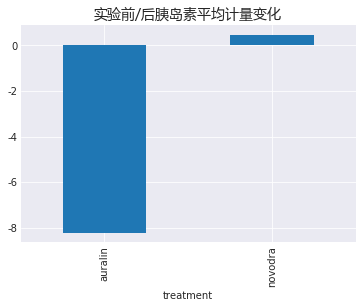

In [51]:
ax = treatment_group.mean().does_change.plot(kind='bar') #ax是pandas plot的返回实例，它的类是matplotlib的axes对象，里面有很多设置图的方法
ax.set_title('实验前/后胰岛素平均计量变化', fontproperties=font)#设置图表的标题，字体为中文字体
plt.show()

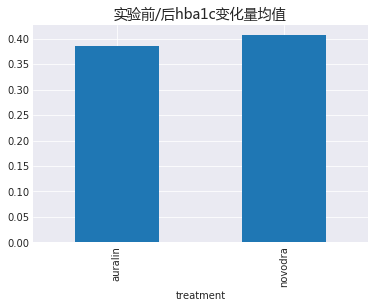

In [52]:
ax = treatment_group.mean().hba1c_change.plot(kind='bar') #ax是pandas plot的返回实例，它的类是matplotlib的axes对象，里面有很多设置图的方法
ax.set_title('实验前/后hba1c变化量均值', fontproperties=font)#设置图表的标题，字体为中文字体
plt.show()

In [53]:
treatment_group.mean().info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, auralin to novodra
Data columns (total 7 columns):
hba1c_start     2 non-null float64
hba1c_end       2 non-null float64
hba1c_change    2 non-null float64
does_start      2 non-null float64
does_end        2 non-null float64
does_change     2 non-null float64
patient_id      2 non-null float64
dtypes: float64(7)
memory usage: 208.0+ bytes


In [54]:
after_adverse_reactions = treatment_group['adverse_reaction'].value_counts()
after_adverse_reactions

treatment  adverse_reaction         
auralin    hypoglycemia                 9
           throat irritation            2
           headache                     1
           nausea                       1
novodra    hypoglycemia                 9
           headache                     2
           injection site discomfort    2
           cough                        1
Name: adverse_reaction, dtype: int64

In [55]:
after_adverse_reactions.unstack()

adverse_reaction,cough,headache,hypoglycemia,injection site discomfort,nausea,throat irritation
treatment,,,,,,
auralin,NaN,1.0,9.0,NaN,1.0,2.0
novodra,1.0,2.0,9.0,2.0,NaN,NaN


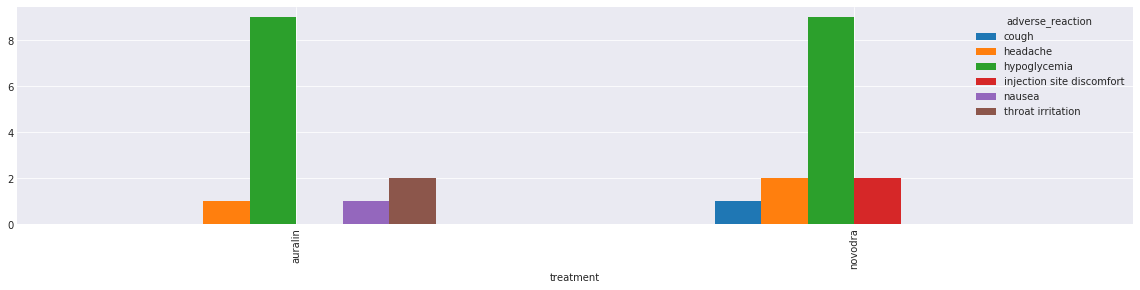

In [56]:
after_adverse_reactions.unstack().plot(kind='bar', figsize=(20, 4))

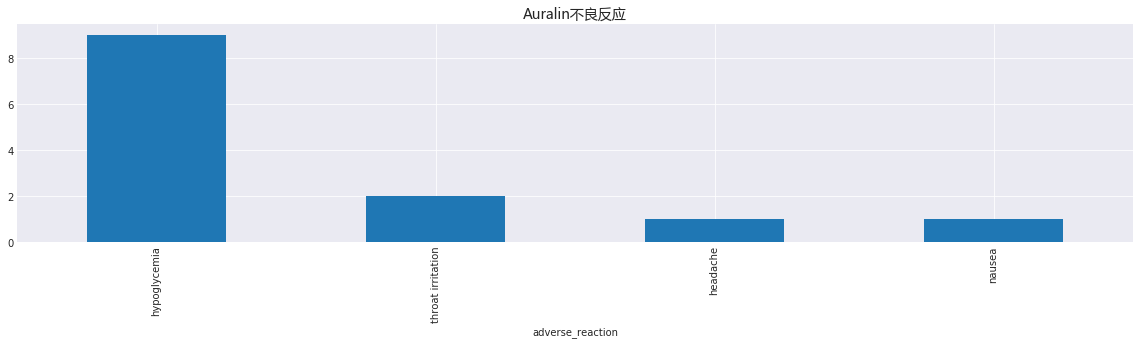

In [57]:
ax = after_adverse_reactions.auralin.plot(kind='bar', figsize=(20, 4)) #ax是pandas plot的返回实例，它的类是matplotlib的axes对象，里面有很多设置图的方法
ax.set_title('Auralin不良反应', fontproperties=font)#设置图表的标题，字体为中文字体
plt.show()

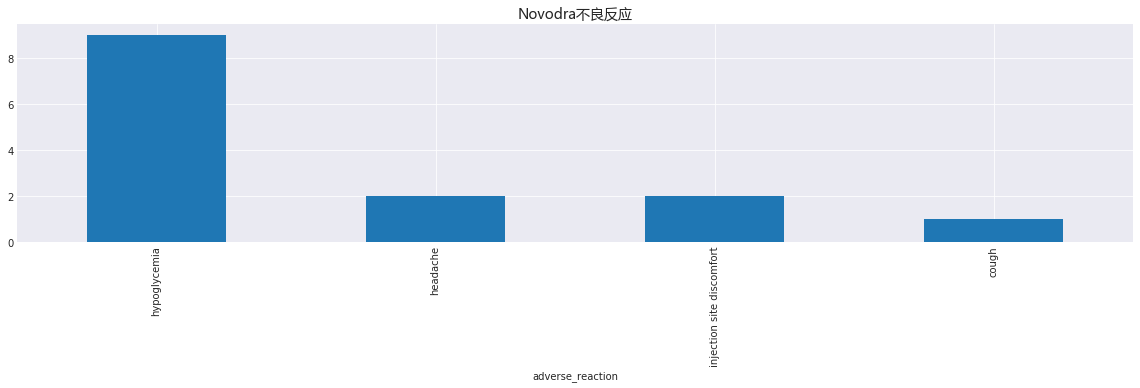

In [58]:
ax = after_adverse_reactions.novodra.plot(kind='bar', figsize=(20, 4)) #ax是pandas plot的返回实例，它的类是matplotlib的axes对象，里面有很多设置图的方法
ax.set_title('Novodra不良反应', fontproperties=font)#设置图表的标题，字体为中文字体
plt.show()

对比下面的循环遍历，Groupby能让我们直接免去循环, 而且不需要烦人的筛选, 一行就完美搞定

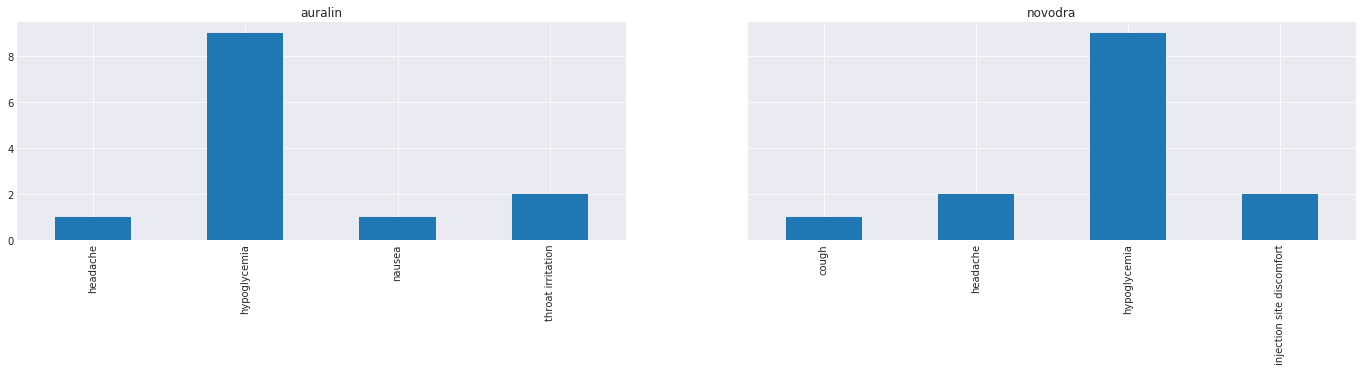

In [59]:
ts = np.sort(treatments_final['treatment'].dropna().unique())
fig, axes = plt.subplots(1, len(ts), figsize = (24, 4), sharey=True)
for ax, t in zip(axes, ts):
    treatments_final[treatments_final['treatment'] == t]['adverse_reaction'].value_counts().sort_index().plot(kind='bar', ax=ax, title=t)


<h5><a href="https://hufe09.github.io/archive/?tag=Data+Wrangling">Hufe Blog</a><h5>